In [1]:
# imports
import pandas as pd
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

pd.options.display.float_format = '{:,.2f}'.format

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 4

### Analyze accidents by 
* month
* day of week
* weather

## download the data
and look at it 

In [2]:
# loc = '../Downloads/Metro_Nashville___Davidson_County_Traffic_Crashes__2018_.csv'
loc = 'https://data.nashville.gov/api/views/8kay-6qhc/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(loc,parse_dates=['Date and Time'])
# df.head()
df[:1].T

,0
Accident Number,20181075326
Date and Time,2018-12-31 23:10:00
Number of Motor Vehicles,1.00
Number of Injuries,0
Number of Fatalities,0
Property Damage,NaN
Hit and Run,N
Reporting Officer,"240,964.00"
Collision Type Code,0.00
Collision Type Description,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT


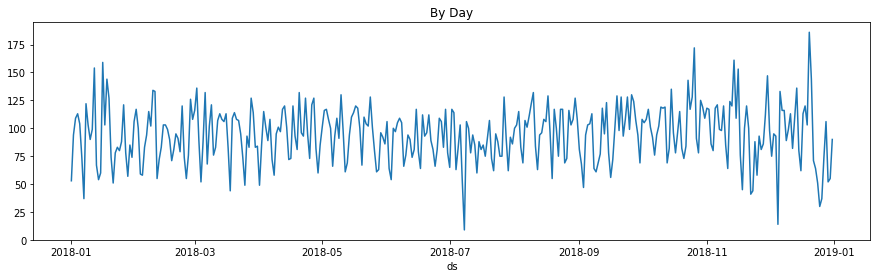

In [3]:
df['ds'] = df["Date and Time"].dt.date
df.groupby(['ds'])['Accident Number'].count().plot(title='By Day')

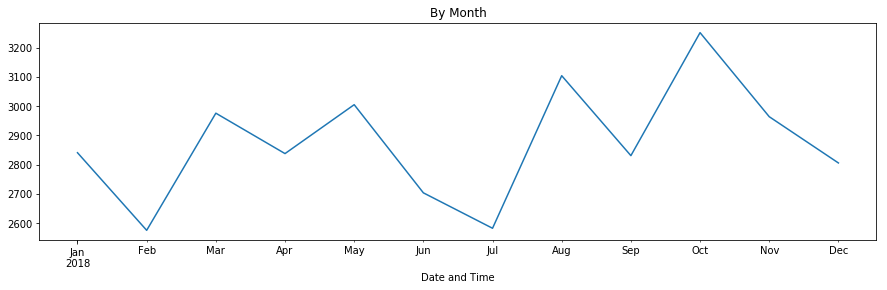

In [4]:
df.set_index(["Date and Time"]).resample('M')['Accident Number'].count().plot(title='By Month');

## what are monthly and weekly trends

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\hvu7470\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


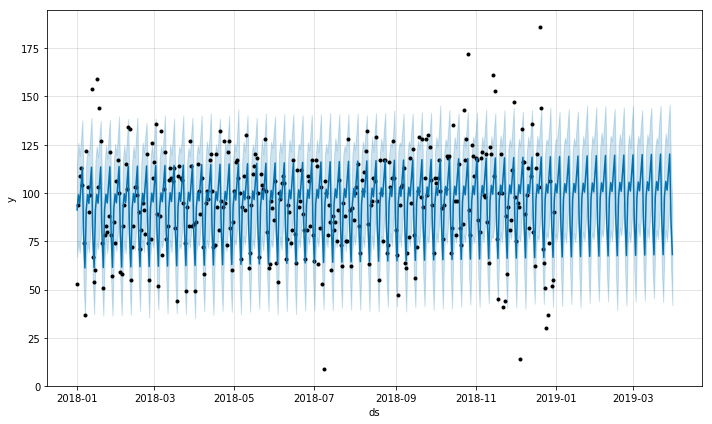

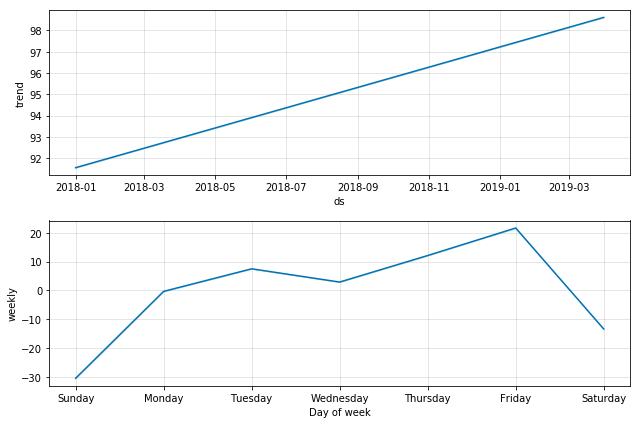

In [8]:
# business friendly forecasting package developed by facebook.  uses bayesian approach and stan underneath
from fbprophet import Prophet

m = Prophet()

# requires columns ds and y (date and value respectively)
m.fit(df.groupby(['ds'],as_index=False)['Accident Number'].count().rename(columns={'Accident Number':'y'}))

future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

best to work from home on fridays

### How does weather / illumination affect things?

In [6]:
df['Weather Description'].value_counts()
df['Illumination Description'].value_counts()

CLEAR                23606
RAIN                  5162
CLOUDY                4872
UNKNOWN                317
SNOW                   278
FOG                     70
SLEET, HAIL             60
OTHER (NARRATIVE)       22
BLOWING SNOW            13
SEVERE CROSSWIND         4
SMOG, SMOKE              3
Name: Weather Description, dtype: int64

DAYLIGHT                 23791
DARK - LIGHTED            7152
DARK - NOT LIGHTED        1890
DUSK                       691
DAWN                       326
UNKNOWN                    323
Dark-Unknown Lighting      220
OTHER                       55
Name: Illumination Description, dtype: int64

In [7]:
df.groupby(['Weather Description'])['Number of Injuries'].sum() / df['Number of Injuries'].sum()

Weather Description
BLOWING SNOW        0.00
CLEAR               0.69
CLOUDY              0.14
FOG                 0.00
OTHER (NARRATIVE)   0.00
RAIN                0.15
SEVERE CROSSWIND    0.00
SLEET, HAIL         0.00
SMOG, SMOKE         0.00
SNOW                0.00
UNKNOWN             0.00
Name: Number of Injuries, dtype: float64

Accidents and injuries align with clear daylight.  However the whole dataset is for accidents.  If I had mileage data for the entire population, I could examine if weather and lighting increase the liklihood of accident.